In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components = 2)
pca.fit(iris.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
data_pca = pca.transform(iris.data)

In [12]:
kpca = KernelPCA(n_components = 2, kernel = "rbf",gamma = 3)
kpca.fit(iris.data)
data_kpca_poly = kpca.transform(iris.data)

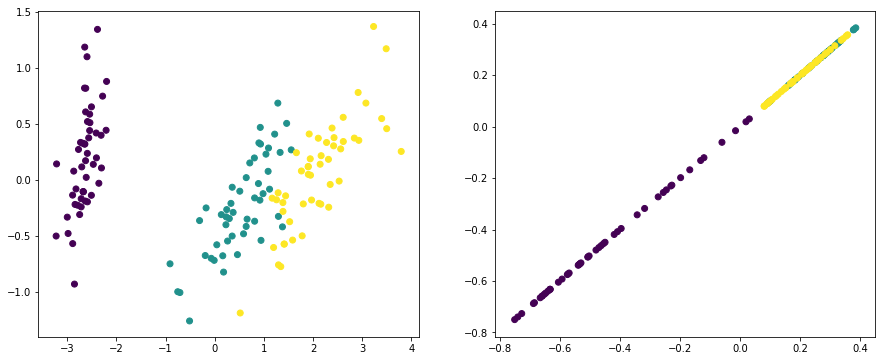

In [13]:
import matplotlib.pyplot as plt
colors = ['blue', 'darkorange', 'black']
plt.figure(figsize = (15,6))
plt.subplot(1,2, 1)
plt.scatter(data_pca[:,0], data_pca[:,1], c = iris.target)
plt.subplot(1,2, 2)
plt.scatter(data_kpca_poly[:,0], data_kpca_poly[:,0], c = iris.target)
plt.show()

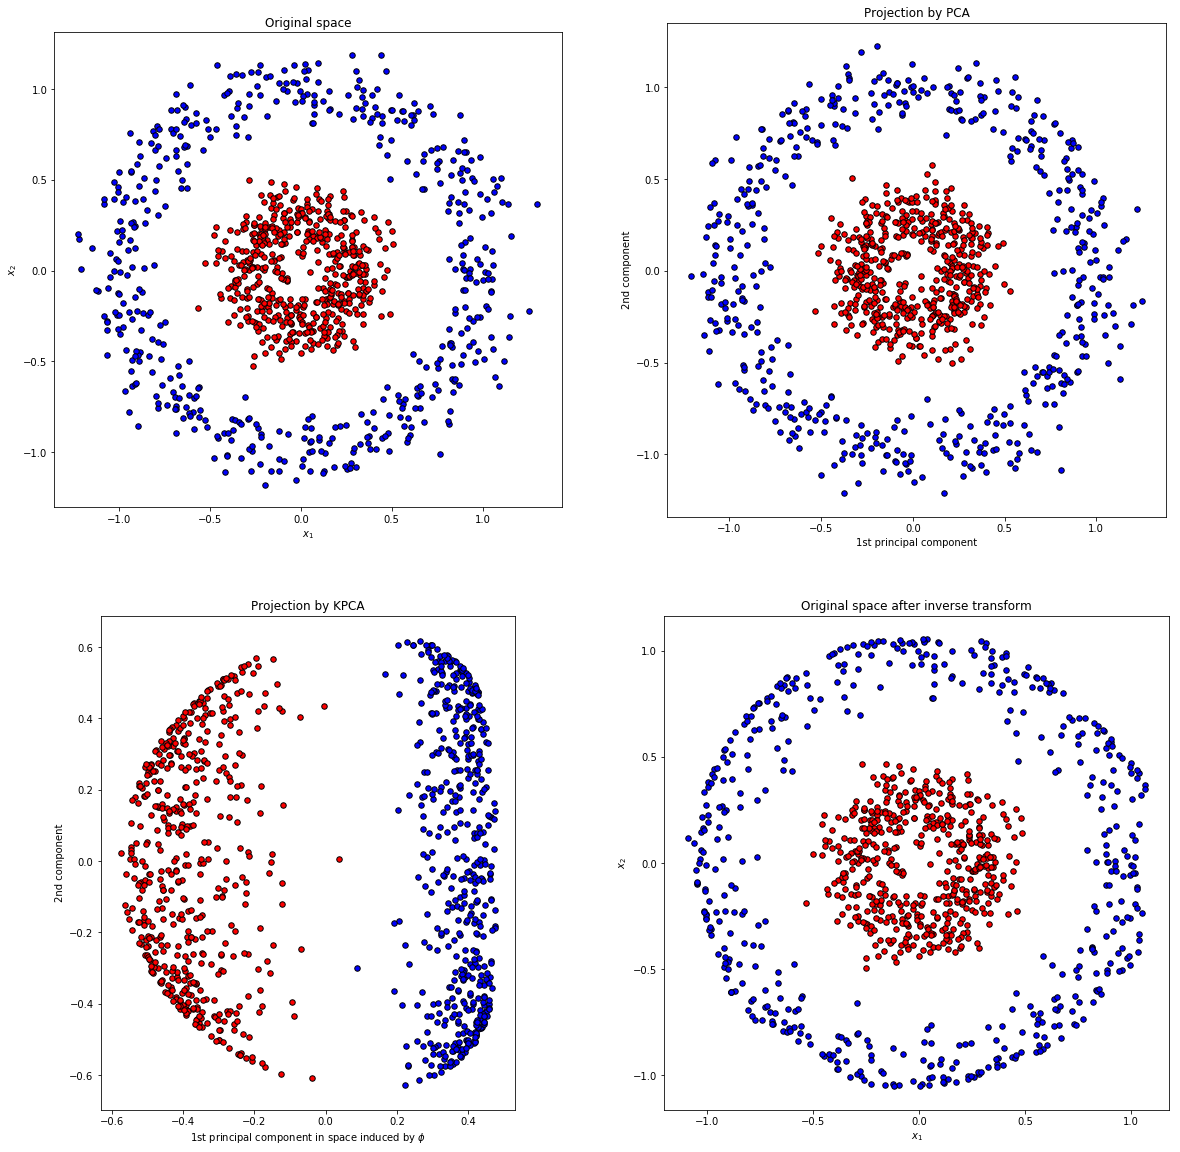

In [103]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=1000, factor=.3, noise=.1)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma = 2)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure(figsize = (20,20))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
blues = y == 0
reds = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=30, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=30, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=30, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=30, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=30, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=30, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=30, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=30, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig('D:/Work/KernelPCA.png')
plt.show()

In [26]:
X_re = np.zeros(shape = (1000,3))    

In [77]:
import math
for i in range(1000):
    X_re[i,0] = X[i,0]
    X_re[i,1] = X[i,1]
    X_re[i,2] = X[i,1]*X[i,1] + X[i,0]*X[i,0]

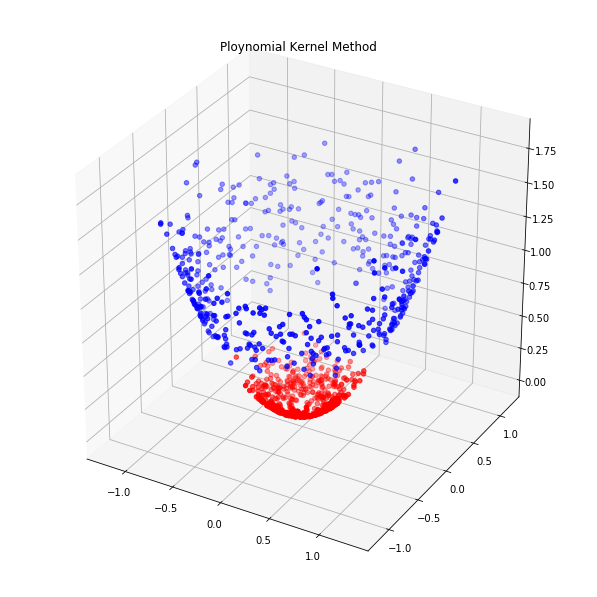

In [100]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(X_re[reds,0], X_re[reds,1], X_re[reds, 2], c = 'red')
ax.scatter(X_re[blues,0], X_re[blues,1], X_re[blues, 2], c = 'blue')
plt.title("Ploynomial Kernel Method")
plt.savefig('D:/Work/Poly.png')
plt.show()

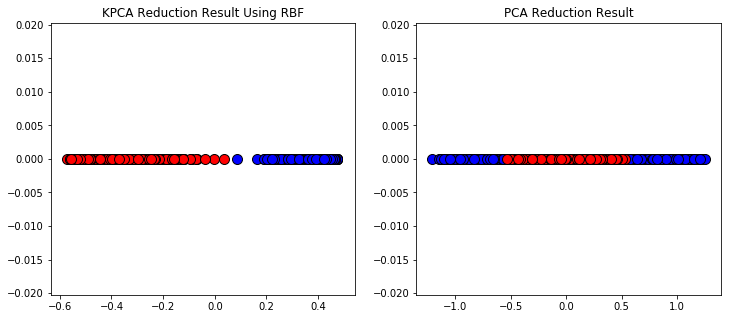

In [112]:
fig = plt.figure(figsize = (12,5))
ze = np.zeros(1000)
plt.subplot(1,2,1)
plt.scatter(X_kpca[blues,0], ze[blues], c = 'blue',
           s=100, edgecolor='k')
plt.scatter(X_kpca[reds,0], ze[reds], c = 'red',
           s=100, edgecolor='k')
plt.title("KPCA Reduction Result Using RBF")
plt.subplot(1,2,2)
plt.scatter(X_pca[blues,0], ze[blues], c = 'blue',
           s=100, edgecolor='k')
plt.scatter(X_pca[reds,0], ze[reds], c = 'red',
           s=100, edgecolor='k')
plt.title("PCA Reduction Result")
plt.savefig('D:/Work/result')
plt.show()

In [107]:
kpca2 = KernelPCA(kernel="poly", fit_inverse_transform=True, degree= 2)
X_kpca2 = kpca2.fit_transform(X)

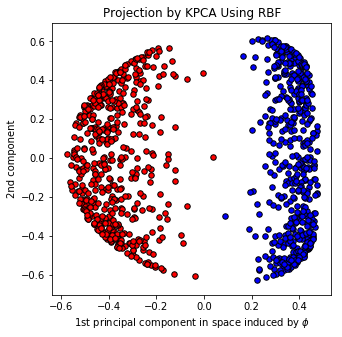

In [109]:
fig = plt.figure(figsize=(5,5))
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=30, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=30, edgecolor='k')
plt.title("Projection by KPCA Using RBF")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.savefig('D:/Work/p4.png')
plt.show()